# I. Fit a (weak) line to NHI vs W$_0^{\lambda2796}$ data

In [105]:
from IPython.core.display import HTML
css = open('/home/ec2-user/blog/posts/style-table.css').read() \
+ open('/home/ec2-user/blog/posts/style-notebook.css').read()
HTML('<style>{}</style>'.format(css));

%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import matplotlib.ticker as tkr

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

import pandas as pd
import numpy as np

import scipy.optimize as optimization
from scipy import stats
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


#define plotter
minorLocatorx   = AutoMinorLocator(10)
minorLocatory   = AutoMinorLocator(4)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.linewidth'] = 4
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman') 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

### 1.1 Load data, view first few entries and translate into an error in NHI

In [106]:
NHIdata = pd.read_csv('WNHIDLAs.dat', delimiter=' ')
NHIdata.head()

,W2796,Werror,NHI,NHIpluserror
0,1.092,0.129,2.000000e+20,2.500000e+20
1,1.671,0.072,2.000000e+20,3.100000e+20
2,2.900,0.000,2.000000e+20,2.200000e+20
3,2.920,0.230,2.000000e+20,3.000000e+20
4,1.896,0.077,2.100000e+20,2.400000e+20


In [107]:
logNHI = np.log10(NHIdata.NHI)
logNHIerr = np.log10(NHIdata.NHI) - np.log10(NHIdata.NHIpluserror)

In [108]:
NHIdata['NHI'] = (NHIdata['NHI'])*1e-20
NHIdata['NHIpluserror'] = NHIdata['NHIpluserror']*1e-20
NHIdata['NHIerr'] = np.abs(NHIdata.NHI - NHIdata.NHIpluserror)
NHIdata.head()

,W2796,Werror,NHI,NHIpluserror,NHIerr
0,1.092,0.129,2.0,2.5,0.5
1,1.671,0.072,2.0,3.1,1.1
2,2.900,0.000,2.0,2.2,0.2
3,2.920,0.230,2.0,3.0,1.0
4,1.896,0.077,2.1,2.4,0.3


### 1.2. Define model, inititalize and do the fitting

In [109]:
def linearfit(W, m, b):
    return m*W + b

In [110]:
# Initialize
p0=[0.,1]

### 1.3 Do the fitting and print the results

In [111]:
popt0, pcov0 = optimization.curve_fit(linearfit, NHIdata.W2796, logNHI, p0,  logNHIerr)
error0 = np.sqrt(pcov0.diagonal())
print(" ")
print(" ")
print("   slope    =    %.3f" % popt0[0] + '  \pm   %.3f' % error0[0])
print("   intecept =    %.3f" % popt0[1] + '  \pm   %.3f' % error0[1])
print(" ")
print(" ")

 
 
   slope    =    -0.116  \pm   0.060
   intecept =    21.105  \pm   0.114
 
 


In [112]:
popt, pcov = optimization.curve_fit(linearfit, NHIdata.W2796, NHIdata.NHI, p0,  NHIdata.NHIerr)
error = np.sqrt(pcov.diagonal())
print(" ")
print(" ")
print("   slope    =    %.3f" % popt[0] + '  \pm   %.3f' % error[0])
print("   intecept =    %.3f" % popt[1] + '  \pm   %.3f' % error[1])
print(" ")
print(" ")

 
 
   slope    =    -0.298  \pm   0.511
   intecept =    4.304  \pm   1.011
 
 


### 1.4. Plot the results

/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:2790: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


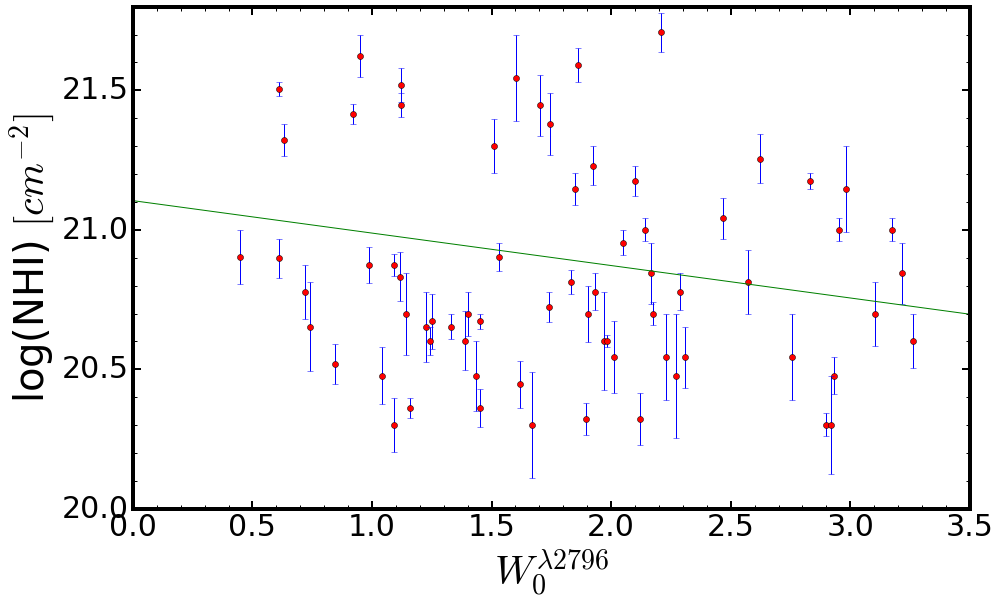

In [113]:
ax=plt.plot(NHIdata.W2796, logNHI, 'ro')
plt.errorbar(NHIdata.W2796, logNHI, yerr=logNHIerr, fmt=None)
plt.xlabel(r'$W_0^{\lambda 2796}$', fontsize = 40)
plt.ylabel(r'log(NHI) $[cm^{-2}]$', fontsize = 40)

plt.minorticks_on()
plt.tick_params(axis='both',color='k',length=8,width=2, labelsize=30)
plt.tick_params(which='minor',axis='both', color='k',length=4,width=1)
plt.xlim(0,3.5)
W=np.arange(0, 4, 0.1)
plt.plot(W, linearfit(W, popt0[0], popt0[1]))

/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:2790: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


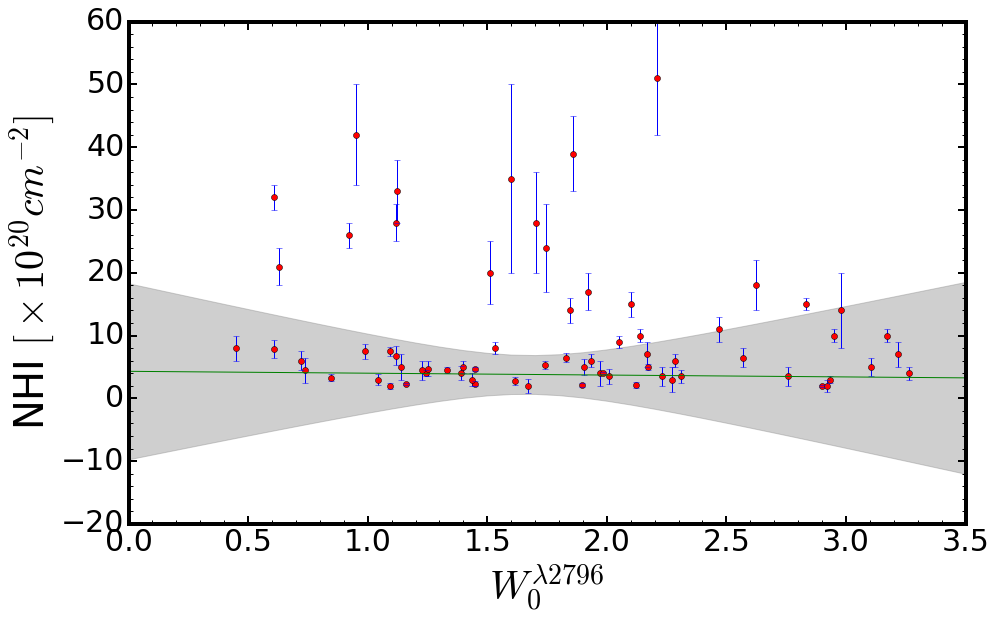

In [114]:
ax=plt.plot(NHIdata.W2796, NHIdata.NHI, 'ro')
plt.errorbar(NHIdata.W2796, NHIdata.NHI, yerr=NHIdata.NHIerr, fmt=None)

plt.xlabel(r'$W_0^{\lambda 2796}$', fontsize = 40)
plt.ylabel(r'NHI $[\times 10^{20}cm^{-2}]$', fontsize = 40)
plt.minorticks_on()
plt.tick_params(axis='both',color='k',length=8,width=2, labelsize=30)
plt.tick_params(which='minor',axis='both', color='k',length=4,width=1)
plt.xlim(0,3.5)
#plt.ylim(0, 60)
W=np.arange(0, 4, 0.1)
plt.plot(W, linearfit(W, popt[0], popt[1]))

#Plotting the 95% confidence interval for the line.
y_hat = linearfit(NHIdata.W2796, popt[0], popt[1])
y_err = NHIdata.NHI - y_hat
mean_W = NHIdata.W2796.T[1].mean()
n = len(NHIdata.W2796)
dof = n - 2 - 1
t = stats.t.ppf(1-0.025, df=dof) #95% CONFIDENCE INTERVAL FOR THE REGRRESSION LINE.
s_err = np.sum(np.power(y_err, 2))
np.sqrt((s_err/(n-2)))
conf = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((W-mean_W),2)/((np.sum(np.power(W,2))) - n*(np.power(mean_W,2))))))
upper = linearfit(W, popt[0], popt[1]) + abs(conf)
lower = linearfit(W, popt[0], popt[1]) - abs(conf)
plt.fill_between(W, lower, upper, color='#888888', alpha=0.4)

## Notes:
 ### 1. The large-NHI points have large errors! Therefore, they are weighted less.
 ### 2. The grey band is the 95% confidence interval for the linear model. The calculation assumes that the errors are normally distributed. A discussion on this calculation of confidence band for linear regression can be found [here](https://en.wikipedia.org/wiki/Simple_linear_regression).
 ### 3. After some reading, I learned that Python has another statistical package that allows the calculation of a p-value for each parameter of the model. This is implemented in the cell below.
 ### 4. The results are printed as a table of values. The results are essentially the same as above, which is my usual way of model fitting. Note that the row "W2796" should have been the "slope". I can't figure out a way to replace this label.
 ### 5. Refer especially to the column " P > |t| " in second table. This shows the p-values of the parameters. (The p-values are for an [F-test](https://en.wikipedia.org/wiki/F-test) of the model.)
 ### 6. The slope has quite a large p-value, which implies that there is no gain in having a "slope" parameter for this model. 
 ### 7. The intercept has a very significant result, p = 0.0001. This tells us that a line of ZERO slope is sufficient to describe the relation of NHI to W$_0^{\lambda 2796}$ at a large significance.

nan
1.15285298282e+21
1.44799924661e+21
8.88506862351e+19
1.27205051e+21
1.06625939194e+21
1.47127646771e+21
5.79511288357e+20
5.77659481174e+20
2.64575131106e+20


/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                Results: Weigthed least squares
================================================================================================================================
Model:                                   WLS                                   Adj. R-squared:                          -0.123  
Dependent Variable:                      y                                     AIC:                                     984.5910
Date:                                    2017-07-06 02:37                      BIC:                                     985.1962
No. Observations:                        10                                    Log-Likelihood:                          -490.30 
Df Model:                                1                                     F-statistic:                             0.01116 
Df Residuals:                            8                                     Prob (F-statistic):                      0.918   
R-squared:                               0.001                                 Scale:                                   0.92069 
--------------------------------------------------------------------------------------------------------------------------------
                Coef.                     Std.Err.            t    P>|t|             [0.025                     0.975]          
--------------------------------------------------------------------------------------------------------------------------------
const 504429326969199722496.0000 170233529919067586560.0000 2.9632 0.0181  111870103054502854656.0000 896988550883896590336.0000
x1     11450820545129676800.0000 108398693126670499840.0000 0.1056 0.9185 -238517014037185888256.0000 261418655127445241856.0000
--------------------------------------------------------------------------------------------------------------------------------
Omnibus:                                    12.482                            Durbin-Watson:                               1.337
Prob(Omnibus):                              0.002                             Jarque-Bera (JB):                            5.855
Skew:                                       -1.504                            Prob(JB):                                    0.054
Kurtosis:                                   5.238                             Condition No.:                               5    
================================================================================================================================
The smallest eigenvalue is 5.88e-40. This might indicate that            there are strong multicollinearity problems or that the
design            matrix is singular.
"""

/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


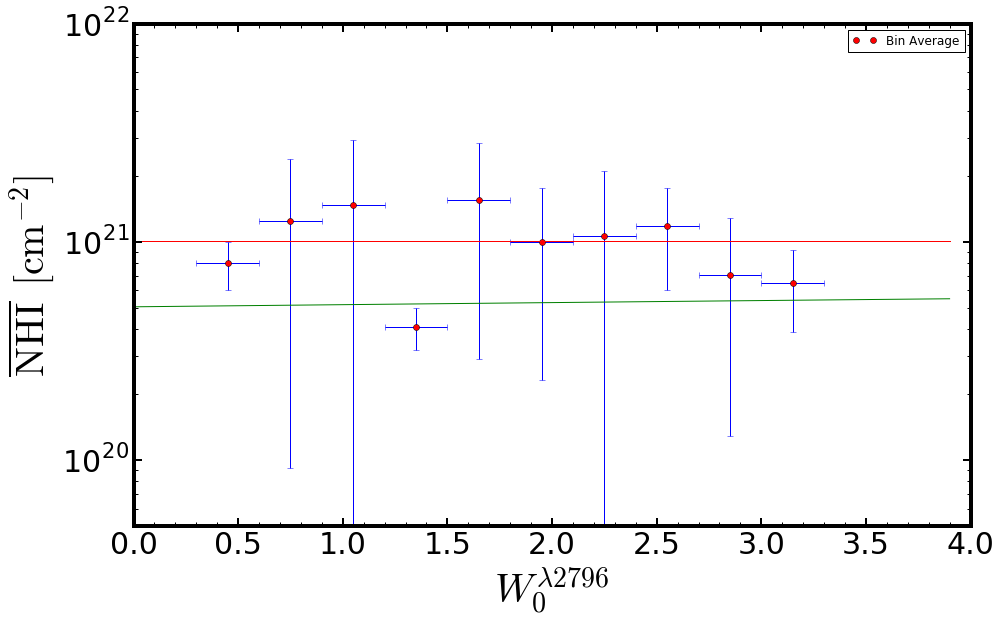

In [115]:
bins=np.arange(0.3, 3.3, 0.3)
centers = bins+0.15
def bindata(low, high):  
    binned_data = NHIdata[(NHIdata.W2796 >= low) &  (NHIdata.W2796 < high)]
    print(binned_data['NHI'].std()*1e20)
    return {'means':  binned_data['NHI'].mean()*1e20, 'yerr': binned_data['NHI'].std()*1e20}

#'maxNHI': binned_data['NHI'].max()*1e20, 'minNHI': binned_data['NHI'].min()*1e20}


means=[]
yerr = []
for edge in bins:
    result = bindata(edge, edge+0.3)
    means.append(result['means'])
    yerr.append(result['yerr'])

yerr[0] =  2e20
yerr = np.array(yerr)


yerr_lo = yerr
yerr_lo[yerr_lo>=means] = yerr_lo[yerr_lo>=means]*0.72
plt.plot(centers, means, 'ro', label='Bin Average')
plt.errorbar(centers, means, xerr = 0.15, 
             yerr = [yerr_lo, yerr], fmt='none')

plt.legend()
plt.xlabel(r'$W_0^{\lambda 2796}$', fontsize = 40)
plt.ylabel(r'$\mathrm{\overline{NHI } \, \, \, [ cm^{-2}]}$', fontsize = 40)
plt.minorticks_on()
plt.tick_params(axis='both',color='k',length=8,width=2, labelsize=30)
plt.tick_params(which='minor',axis='both', color='k',length=4,width=1)
plt.semilogy()

model = sm.WLS(means, sm.add_constant(centers), weights=1./yerr**2)
fitted = model.fit()
sdev, lower, upper = wls_prediction_std(fitted)
plt.plot(W, linearfit(W,fitted.params[1], fitted.params[0]), 'g-')
plt.plot(W, linearfit(W,0, np.mean(means)), 'r-')

plt.ylim(5e19, 1e22)

fitted.summary2()

## Log-space Calculation
The grey band is the 95% confidence region for the "Inv Error Weights"

[ 0.10857362  0.40215075  0.42412256  0.09462841  0.35328187  0.33310799
  0.43360643  0.2126861   0.35477177  0.17677465]


/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


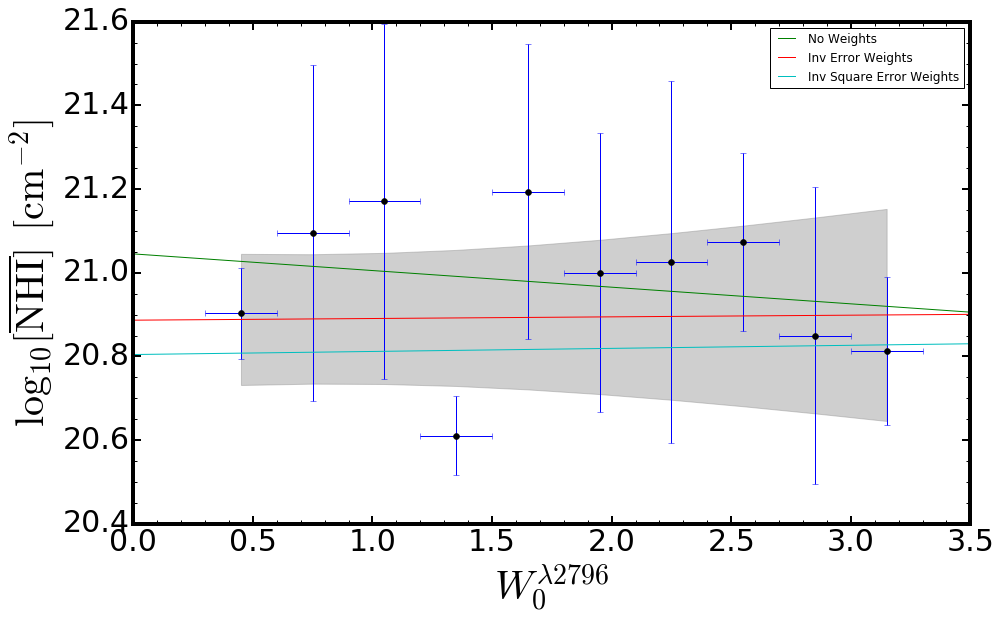

In [116]:
##In log-space:

log_err = yerr/means/np.log(10) #Propagate the error right!
plt.plot(centers, np.log10(means), 'ko')
plt.errorbar(centers, np.log10(means), xerr=0.15, yerr= log_err, fmt='none')

model = sm.WLS(np.log10(means), sm.add_constant(centers), weights=1.)#/log_err)
fitted1 = model.fit()
plt.plot(W, linearfit(W, fitted1.params[1], fitted1.params[0]), label= 'No Weights')

model = sm.WLS(np.log10(means), sm.add_constant(centers), weights=1./log_err)
fitted2 = model.fit()
plt.plot(W, linearfit(W, fitted2.params[1], fitted2.params[0]), label= 'Inv Error Weights')

model = sm.WLS(np.log10(means), sm.add_constant(centers), weights=1./log_err**2)
fitted3 = model.fit()
plt.plot(W, linearfit(W, fitted3.params[1], fitted3.params[0]), label= 'Inv Square Error Weights')
plt.xlim(0,3.5)
plt.legend()
plt.xlabel(r'$W_0^{\lambda 2796}$', fontsize = 40)
plt.ylabel(r'$\mathrm{log_{10}[\overline{NHI }] \, \, \, [ cm^{-2}]}$', fontsize = 40)
plt.minorticks_on()
plt.tick_params(axis='both',color='k',length=8,width=2, labelsize=30)
plt.tick_params(which='minor',axis='both', color='k',length=4,width=1)
#Plotting the 95% confidence interval for the line with "Inv Error weights".
y_hat = linearfit(centers, fitted2.params[1], fitted2.params[0])
y_err = np.log10(means) - y_hat
mean_centers = centers.T[1].mean()
n = len(centers)
dof = n - 2 
t = stats.t.ppf(1-0.025, df=dof) #95% CONFIDENCE INTERVAL FOR THE REGRRESSION LINE.
s_err = np.sum(np.power(y_err, 2))
np.sqrt((s_err/(n-2)))
conf = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((centers-mean_centers),2)/((np.sum(np.power(centers,2))) - n*(np.power(mean_centers,2))))))
upper = linearfit(centers, fitted2.params[1], fitted2.params[0]) + abs(conf)
lower = linearfit(centers, fitted2.params[1], fitted2.params[0]) - abs(conf)
plt.fill_between(centers, lower, upper, color='#888888', alpha=0.4)
print(log_err)

In [117]:
fitted1.summary2()

/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Weigthed least squares
=================================================================
Model:              WLS              Adj. R-squared:     -0.080  
Dependent Variable: y                AIC:                -3.3021 
Date:               2017-07-06 02:37 BIC:                -2.6970 
No. Observations:   10               Log-Likelihood:     3.6511  
Df Model:           1                F-statistic:        0.3331  
Df Residuals:       8                Prob (F-statistic): 0.580   
R-squared:          0.040            Scale:              0.035262
-------------------------------------------------------------------
          Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const    21.0452     0.1375   153.0272   0.0000   20.7280   21.3623
x1       -0.0398     0.0689    -0.5772   0.5797   -0.1987    0.1191
-----------------------------------------------------------------
Omnibus:               3.280        Durbin-Watson:          2.796
Prob(Omnibus):         0.194        Jarque-Bera (JB):       1.275
Skew:                  -0.873       Prob(JB):               0.529
Kurtosis:              3.110        Condition No.:          6    
=================================================================

"""

# II. Mg II versus non Mg II - selected samples of NHI
   + Are the MgII - selected sub/DLAs from the same parent population as those that were selected otherwise?

In [118]:
model = sm.WLS(NHIdata.NHI, sm.add_constant(NHIdata.W2796), weights=1./NHIdata.NHIerr**2)
fitted = model.fit()
sdev, lower, upper = wls_prediction_std(fitted)
fitted.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Weigthed least squares
=================================================================
Model:              WLS              Adj. R-squared:     -0.010  
Dependent Variable: NHI              AIC:                447.5102
Date:               2017-07-06 02:37 BIC:                452.0072
No. Observations:   70               Log-Likelihood:     -221.76 
Df Model:           1                F-statistic:        0.3389  
Df Residuals:       68               Prob (F-statistic): 0.562   
R-squared:          0.005            Scale:              19.015  
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
const       4.3041     1.0113    4.2562   0.0001    2.2862   6.3220
W2796      -0.2975     0.5111   -0.5821   0.5624   -1.3175   0.7224
-----------------------------------------------------------------
Omnibus:              5.535        Durbin-Watson:           0.496
Prob(Omnibus):        0.063        Jarque-Bera (JB):        6.765
Skew:                 0.256        Prob(JB):                0.034
Kurtosis:             4.435        Condition No.:           7    
=================================================================

"""

### 2.1. Load the data and subdivide into groups based on flag

In [119]:
data = np.genfromtxt('NHIX01.dat', names=True, delimiter=',')
nonMgIIselected = data[np.where(data['flag'] == 0)]
MgIIselected = data[np.where(data['flag'] == 1)]
##For some reason Pandas gives me an error when I subset flag=1?! And I can't figure why.

### 2.2  Visualize the data first:
     * Box plot
     * Histograms

/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


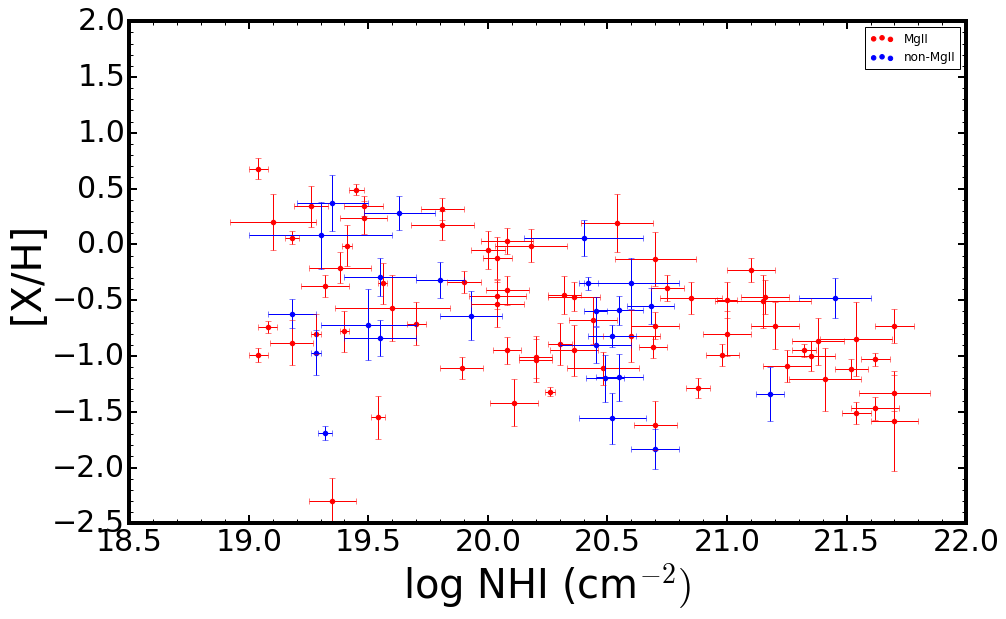

In [120]:
plt.scatter(MgIIselected['logNHI'], MgIIselected['XperH'], color='r')
plt.errorbar(MgIIselected['logNHI'], MgIIselected['XperH'], xerr=MgIIselected['errlogNHI'], \
             yerr=MgIIselected['errXperH'], fmt = 'None', ecolor='r')
plt.scatter(nonMgIIselected['logNHI'], nonMgIIselected['XperH'], color='b')
plt.errorbar(nonMgIIselected['logNHI'], nonMgIIselected['XperH'], xerr=nonMgIIselected['errlogNHI'], \
             yerr=np.array(nonMgIIselected['errXperH']), fmt = 'None', ecolor='b')
plt.xlabel(r'log NHI (cm$^{-2})$', fontsize = 40)
plt.ylabel('[X/H]', fontsize = 40)
plt.ylim(-2.5, 2)
plt.minorticks_on()
plt.tick_params(axis='both',color='k',length=8,width=2, labelsize=30)
plt.tick_params(which='minor',axis='both', color='k',length=4,width=1)
plt.legend(['MgII', 'non-MgII'])

### 2.2.1 Visualize the log [NHI]

#### 2.2.1.1 log NHI Histogram

/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


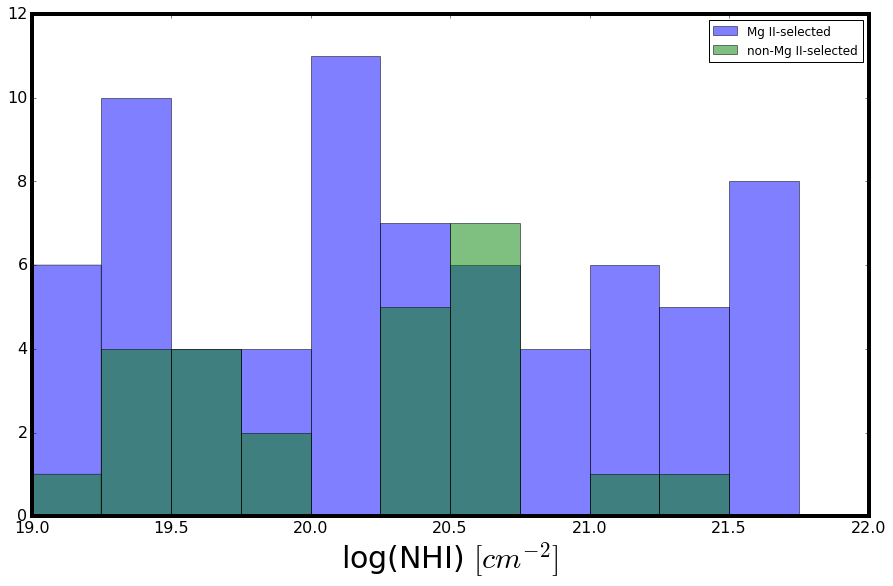

In [121]:
bins = np.arange(19, 22, 0.25)
plt.hist(MgIIselected['logNHI'], bins=bins, alpha = 0.5, label='Mg II-selected')
plt.hist(nonMgIIselected['logNHI'], bins=bins, alpha=0.5, label='non-Mg II-selected')
plt.xlabel(r'log(NHI) $[cm^{-2}]$', fontsize = 30)
plt.rcParams["figure.figsize"] = fig_size
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.linewidth'] = 4
fig_size[0] = 10
fig_size[1] = 10
fig_size = plt.rcParams["figure.figsize"]
plt.legend()

#### 2.2.1.2 Boxplots

#### Box plot of the log [NHI]'s
  ** <font color='green'> The red dot is the mean, the red line is the median. The range of the boxplot is the inter quartile range, Q3 - Q1. **

/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


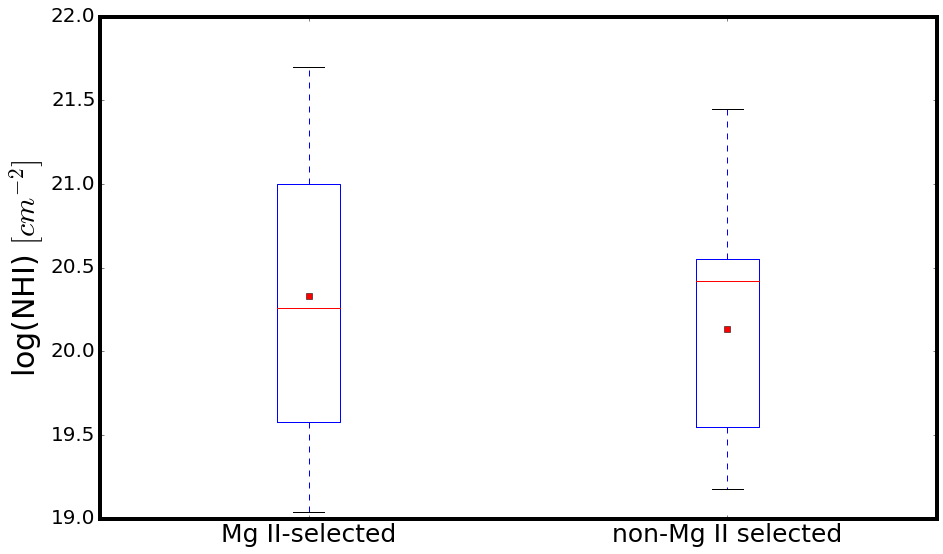

In [122]:
plt.boxplot([MgIIselected['logNHI'], nonMgIIselected['logNHI']], showmeans = True, labels=['Mg II-selected', 'non-Mg II selected'])
plt.ylabel(r'log(NHI) $[cm^{-2}]$', fontsize = 30)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.linewidth'] = 4
plt.rcParams["figure.figsize"] = fig_size

#### 2.2.1.3 Testing the null hypothesis on the two populations:
  1. KS-test
  2. t-test
  3. U-test
  4. Anderson-Darling test

#### 2.2.1.3.1 KS-test using the maximum distance statistic

In [123]:
stats.ks_2samp(MgIIselected['logNHI'], nonMgIIselected['logNHI'])

Ks_2sampResult(statistic=0.26028169014084512, pvalue=0.13739488697898736)

#### 2.2.1.3.2 [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)

In [124]:
stats.ttest_ind(MgIIselected['logNHI'], nonMgIIselected['logNHI'])

Ttest_indResult(statistic=1.0978377728456152, pvalue=0.27507954943174123)

#### 2.2.1.3.3 [U-test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) which uses an ordering/sorting of data points

In [125]:
stats.ranksums(MgIIselected['logNHI'], nonMgIIselected['logNHI'])   

RanksumsResult(statistic=0.90163203267544234, pvalue=0.36725236897548597)

#### 2.2.1.3.4 Anderson-Darling test is a corrected KS-test. 
Since KS-tests are sensitive only at the centers of the distribution. The AD test takes care not only of the center, but also the tails,

In [126]:
stats.anderson_ksamp([MgIIselected['logNHI'], nonMgIIselected['logNHI']])

Anderson_ksampResult(statistic=0.55664336565386219, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.1966390855305483)

# **Conclusion:** 

# <font color='red'> The p-values are large, so we accept the null hypothesis of no differrence between the two log [NHI] distributions.

### 2.2.2 Visualize the [X/H]

#### 2.2.2.1 [X/H] Histogram

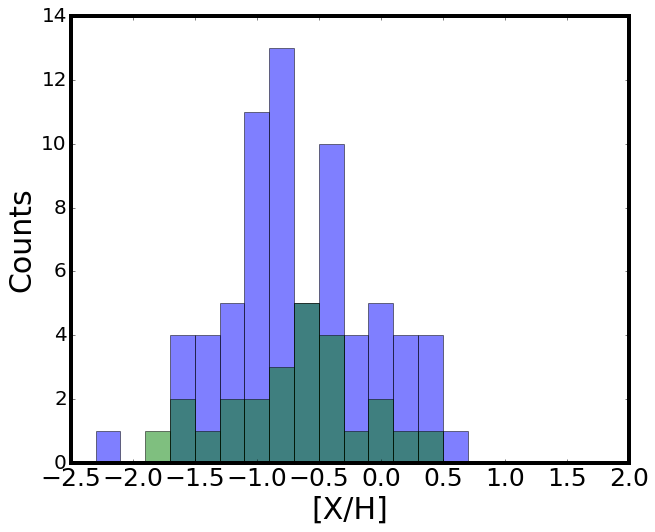

In [127]:
bins = np.arange(-2.5, 2, 0.2)
plt.hist(MgIIselected['XperH'], bins=bins, alpha = 0.5, label='Mg II-selected')
plt.hist(nonMgIIselected['XperH'], bins=bins, alpha=0.5, label='non-Mg II-selected')
plt.xlabel('[X/H]', fontsize = 30)
plt.ylabel('Counts', fontsize = 30)
plt.rcParams["figure.figsize"] = fig_size
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.linewidth'] = 4
fig_size[0] = 10
fig_size[1] = 10
fig_size = plt.rcParams["figure.figsize"]

#### 2.2.2.2 Box plot

(-2.75, 1)

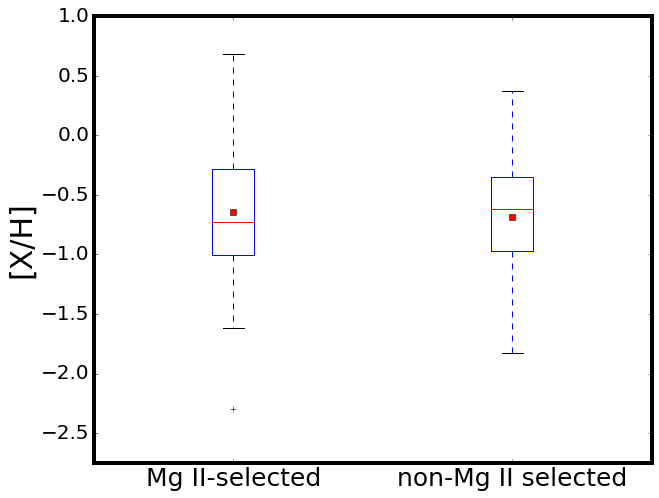

In [128]:
plt.boxplot([MgIIselected['XperH'], nonMgIIselected['XperH']], showmeans = True, labels=['Mg II-selected', 'non-Mg II selected'])
plt.ylabel(r'[X/H]', fontsize = 30)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.linewidth'] = 4
plt.ylim(-2.75,1)

#### 2.2.2.3 Hypothesis Testing for th [X/H] distributions
  1. KS-test
  2. t-test
  3. U-test
  4. Anderson-Darling test

#### 2.2.2.3.1 KS-test using the maximum distance statistic

In [129]:
stats.ks_2samp(MgIIselected['XperH'], nonMgIIselected['XperH'])

Ks_2sampResult(statistic=0.12112676056338023, pvalue=0.93391872636533457)

#### 2.2.2.3.2 t-test of the means

In [130]:
stats.ttest_ind(MgIIselected['XperH'], nonMgIIselected['XperH'])

Ttest_indResult(statistic=0.26869399842761477, pvalue=0.78875400043647381)

#### 2.2.2.3.3 [U-test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

In [131]:
stats.ranksums(MgIIselected['XperH'], nonMgIIselected['XperH'])   

RanksumsResult(statistic=0.041742223734974181, pvalue=0.96670419360461501)

#### 2.2.2.3.4 [Anderson-Darling](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test) test is a corrected KS-test. 
Since KS-tests are sensitive only at the centers of the distribution. The AD test takes care not only of the center, but also the tails.

The p-value is given by the "significance level" value.

In [132]:
stats.anderson_ksamp([MgIIselected['XperH'], nonMgIIselected['XperH']])

/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/scipy/stats/morestats.py:1684: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


Anderson_ksampResult(statistic=-0.93713465593785383, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.9435395764619063)

# Conclusion: 

# <font color='red'> The high p-values indicate we cannot reject the null hypothesis -- of no difference between the two [X/H] distributions.

In [133]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
GaussianNB()
print(clf.predict([[-0.8, -1]]))
clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))
GaussianNB()
print(clf_pf.predict([[-0.8, -1]]))

[1]
[1]


## Figure 10 on Paper 2016. Adding a linear fit to Figure 10

In [151]:
fig10data = pd.read_csv('DataForWZcorrelation.txt', delimiter='\t')

In [152]:
fig10data = fig10data.sort_values(by=['W'])
fig10data.head()

,z,NHI,NHIerr,W,Werr,X/H,X/Herr,f,quasar
12,0.69,21.25,0.10,0.419,0.15,-1.09,0.14,1,1328+307
30,1.42,21.54,0.06,0.610,0.10,-1.51,0.10,1,1354+258
0,0.24,21.32,0.05,0.630,0.11,-0.95,0.06,1,0952+179
23,1.03,21.41,0.15,0.975,0.06,-1.21,0.28,1,1727+5302
26,1.23,20.88,0.05,1.093,0.07,-1.29,0.09,1,1224+0037


                 Results: Weigthed least squares
Model:              WLS              Adj. R-squared:     0.388   
Dependent Variable: X/H              AIC:                24.2123 
Date:               2017-07-06 02:55 BIC:                27.3230 
No. Observations:   35               Log-Likelihood:     -10.106 
Df Model:           1                F-statistic:        22.52   
Df Residuals:       33               Prob (F-statistic): 3.89e-05
R-squared:          0.406            Scale:              4.7118  
-------------------------------------------------------------------
          Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const    -1.3257     0.1005   -13.1974   0.0000   -1.5301   -1.1213
W         0.2734     0.0576     4.7458   0.0000    0.1562    0.3907
-----------------------------------------------------------------
Omnibus:               0.976        Durbin-Watson:          2.159
Prob(Omnibus):   

/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


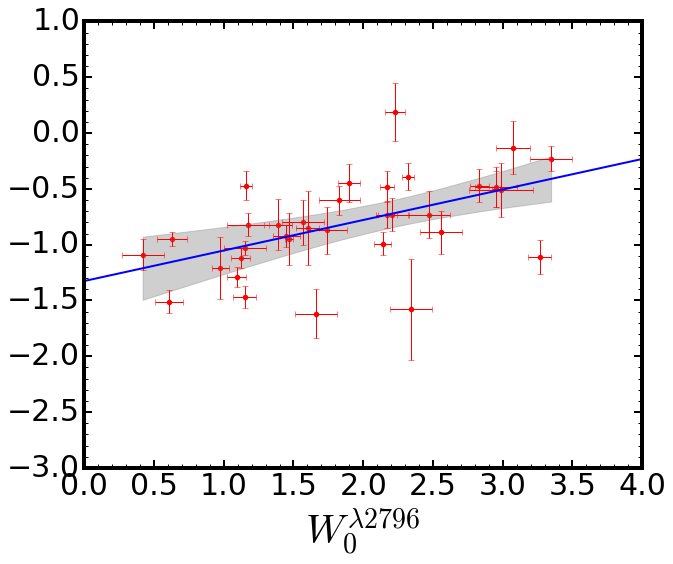

In [153]:
plt.scatter(fig10data['W'], fig10data['X/H'], color='r')
plt.errorbar(fig10data['W'], fig10data['X/H'], xerr=fig10data['Werr'], \
             yerr=fig10data['X/Herr'], fmt = 'None', ecolor='r')
plt.xlabel('[X/H]', fontsize = 40)
plt.xlabel(r'$W_0^{\lambda 2796}$', fontsize = 40)
plt.ylim(-3, 1)
plt.xlim(0,4)
plt.minorticks_on()
plt.tick_params(axis='both',color='k',length=8,width=2, labelsize=30)
plt.tick_params(which='minor',axis='both', color='k',length=4,width=1);

model = sm.WLS(fig10data['X/H'], sm.add_constant(fig10data['W']), weights=1./fig10data['X/Herr']**2)
fitted = model.fit()
sdev, lower, upper = wls_prediction_std(fitted)
print(fitted.summary2())
W = np.arange(0,4.1, 0.1)
plt.plot(W, linearfit(W, fitted.params[1], fitted.params[0]), label= 'Inv Square Error Weights', linewidth=2)

#Plotting the 95% confidence interval for the line with "Inv Error weights".
y_hat = linearfit(fig10data.W, fitted.params[1], fitted.params[0]) # predict y values of origional data using the fit
y_err = fig10data['X/H'] - y_hat # calculate the y-error (residuals)
mean_centers = fig10data['W'].T[1].mean() # now calculate confidence intervals for new test x-series

n = len(fig10data['W'])
dof = n - 2 
t = stats.t.ppf(1-0.025, df=dof) #95% CONFIDENCE INTERVAL FOR THE REGRRESSION LINE.
s_err = np.sum(np.power(y_err, 2))
conf = t * np.sqrt((s_err/(n-2))*(1.0/n +(fig10data['W']-mean_centers)**2/np.sum((fig10data['W'] - mean_centers)**2)))
upper = fig10data.W*fitted.params[1]+fitted.params[0] + abs(conf)
lower = fig10data.W*fitted.params[1]+fitted.params[0] - abs(conf)
plt.fill_between(fig10data.W, lower, upper, color='#888888', alpha=0.4)

In [154]:
len(fig10data)

35